<a href="https://colab.research.google.com/github/yaolihua081/Stanford-CS06dataviz/blob/main/USACovid_19_Death_RateHW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#week 4 HW

from nltk.corpus import stopwords 

import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys, platform, numpy as np, nltk, re, sklearn, pandas as pd, seaborn as sns, collections
tmp = nltk.download(['stopwords', 'gutenberg','punkt'], quiet=True) # See https://www.nltk.org/book/ch02.html
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, HashingVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.tokenize.casual import casual_tokenize
from nltk.tokenize import TweetTokenizer
from nltk import WordPunctTokenizer,RegexpTokenizer
from gensim.summarization.summarizer import summarize
from gensim.summarization import keywords as G_KEA
!pip install rake-nltk # https://pypi.org/project/rake-nltk/
from rake_nltk import Metric, Rake
# Increase viewable area of Pandas tables, numpy arrays, plots
pd.set_option('max_rows', 5, 'max_columns', 500, 'max_colwidth', 1, 'precision', 2)
np.set_printoptions(linewidth=10000, precision=4, edgeitems=20, suppress=True)

import seaborn as sns


import matplotlib.pyplot as plt
import hashlib
import matplotlib.style as style
style.use('fivethirtyeight')
#https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm, united weekly death
#https://data.cdc.gov/NCHS/Weekly-counts-of-death-by-jurisdiction-and-cause-o/u6jv-9ijr/
#https://covid.cdc.gov/covid-data-tracker/#cases_casesper100klast7days

#https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36
#https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-S/9bhg-hcku
#https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W/vsak-wrfu

In [ ]:
#!pip install kaggle
from google.colab import files
files.upload()

Saving United_States_COVIDOct26.csv to United_States_COVIDOct26.csv


{'United_States_COVIDOct26.csv': b'submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths\n01/22/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/23/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/24/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/25/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/26/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/27/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/28/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/29/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/30/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n01/31/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n02/01/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n02/02/2020,CO,0,,,0,,0,,,0,,03/26/2020 04:22:39 PM,Agree,Agree\n02/03/2020,CO,0,,,0,,0,,,0,,03

In [ ]:
ls

sample_data/


In [ ]:
United_States_Covid=pd.read_csv('United_States_COVIDOct26.csv')
#Weekly_Death_data=pd.read_csv('Weekly Death.csv')
#World_Covid=pd.read_csv('owid-covid-data.csv')
#USAStateABV_data=pd.read_csv('USAStateABV.csv')
#United_States_Covid=pd.read_csv('united_states_covid19_cases_and_deaths_by_state.csv')
Sex_age_state_data=pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_State.csv')
Sex_age_week_data=pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_Week.csv')
Sex_age_week_data.dropna()
United_States_Covid.dropna()
Sex_age_state_data.dropna()

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths
0,10/21/2020,United States,5,02/01/2020,All Sex,All Ages,58615,0
1,10/21/2020,United States,5,02/01/2020,All Sex,Under 1 year,388,0
...,...,...,...,...,...,...,...,...
1366,10/21/2020,United States,42,10/17/2020,Female,75-84 years,2138,59
1367,10/21/2020,United States,42,10/17/2020,Female,85 years and over,3662,82


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
85,04/16/2020,CO,8582,7941.0,641.0,302,641.0,373,363.0,10.0,16,10.0,04/16/2020 04:22:39 PM,Agree,Agree
88,04/19/2020,CO,9634,8915.0,719.0,201,719.0,421,408.0,13.0,10,13.0,04/19/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16400,10/24/2020,FSM,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,10/25/2020 01:45:35 PM,Agree,Agree
16401,10/25/2020,FSM,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,10/26/2020 01:41:41 PM,Agree,Agree


,Data as of,Start week,End Week,State,Sex,Age group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote


In [ ]:
United_States_Covid.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [ ]:
Sex_age_week_data.shape #1368,8
Sex_age_week_data['Sex'].unique()

filter=Sex_age_week_data['Sex']=='All Sex'

#Sex_age_week_data[filter]['COVID-19 Deaths'].sum() #total 415752
temp=Sex_age_week_data[filter]
#temp['Age Group'].unique()
filter=temp['Age Group']=='All Ages'
total_death=temp[filter]['COVID-19 Deaths'].sum() #207876

(1368, 8)

array(['All Sex', 'Male', 'Female'], dtype=object)

In [ ]:
week_age_sex_data=Sex_age_week_data.groupby(['MMWR Week','Age Group','Sex']).sum()
temp=pd.DataFrame(week_age_sex_data)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(week_age_sex_data.values)],axis=1).reindex(temp.index)
temp.columns=['week','age_group','Sex','total_deaths','covid-19_deaths']
week_age_sex_covid_data=temp
week_age_sex_covid_data


filter=week_age_sex_covid_data['Sex'].values != 'All Sex'

#week_age_sex_covid_data=week_age_sex_covid_data[filter]

week_age_sex_covid_data=week_age_sex_covid_data[filter]

week_age_sex_covid_data['sex_index']=(week_age_sex_covid_data['Sex']=='Female')*1

week_age_sex_covid_data_F=week_age_sex_covid_data[week_age_sex_covid_data['Sex']=='Female']
week_age_sex_covid_data_M=week_age_sex_covid_data[week_age_sex_covid_data['Sex']=='Male']
week_age_sex_covid_data_pivoted_F = week_age_sex_covid_data_F.pivot(index='week', columns='age_group', values='covid-19_deaths')
weeks=week_age_sex_covid_data_pivoted_F.index

week_age_sex_covid_data_pivoted_M = week_age_sex_covid_data_M.pivot(index='week', columns='age_group', values='covid-19_deaths')
age_group_name=week_age_sex_covid_data_pivoted_M.iloc[0,].index.tolist()

,week,age_group,Sex,total_deaths,covid-19_deaths
0,5,1-4 years,All Sex,65,0
1,5,1-4 years,Female,28,0
...,...,...,...,...,...
1366,42,Under 1 year,Female,24,0
1367,42,Under 1 year,Male,19,0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['35-44 years', '45-54 years', '55-64 years', '65-74 years',
       '75-84 years', '85 years and over'],
      dtype='object', name='age_group')

(4.0, 43.0)

[Text(0, 0, '-400'),
 Text(0, 0, '0 '),
 Text(0, 0, '500 '),
 Text(0, 0, '1000 '),
 Text(0, 0, '1500 '),
 Text(0, 0, '2000 '),
 Text(0, 0, '2500 '),
 Text(0, 0, '3000 ')]

Text(4, -400, 'Lihua Yao © CS06 Data Viz with Python; Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W')

Text(4, 3300, ' Male in 75-84 Years Had the Most Covid-19 Deaths in Week 15 (End of March)')

Text(4, 3100, 'Death Counts from week 5 to week 42 in 2020 Calander Year for Male; Total Deaths of all Gender is 207876')

Text(15, 50, '25-34 years')

Text(15, 450, '45-54 years')

Text(16, 1200, '55-64 years')

Text(15, 2400, '65-74 years')

Text(13, 2200, '75-84 years')

Text(18, 1700, '85 years over')

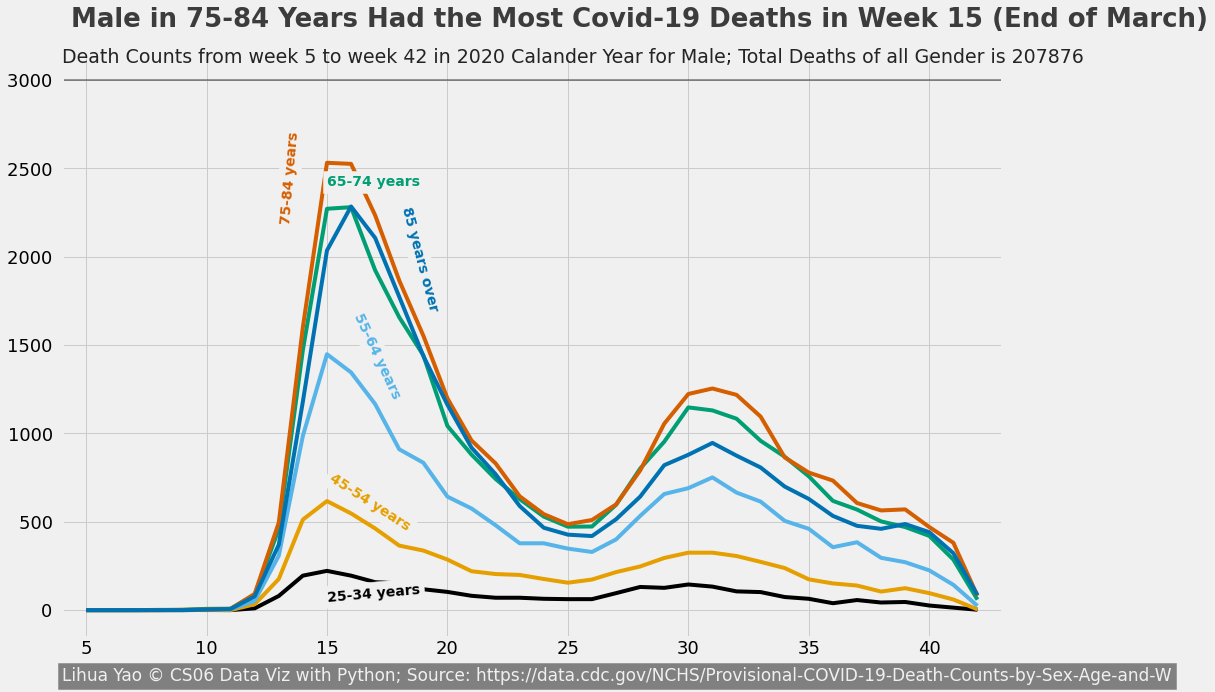

In [ ]:

#week_age_sex_covid_data_pivoted_M[age_group_name]
weeks=week_age_sex_covid_data_pivoted_M.index.tolist()
week_age_sex_covid_data_pivoted_M['week']=weeks
over_50=week_age_sex_covid_data_pivoted_M.loc[15,week_age_sex_covid_data_pivoted_M.iloc[15] >50].index
over_50=over_50[:-1]
over_50

# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255], [0,240/255,190/255]]
covid_plot=week_age_sex_covid_data_pivoted_M.plot(x='week', y=over_50, figsize=(15,10),color=colors, legend=False)
covid_plot.axhline(y=3000, alpha=0.5, linewidth=1.5,color='black')
covid_plot.tick_params(axis='both',which='major',labelsize=18)
covid_plot.set_xlim(left=4, right=43)
covid_plot.set_yticklabels(labels=['-400','0 ' ,'500 ', '1000 ', '1500 ', '2000 ','2500 ','3000 '])
style.use('fivethirtyeight')
# Adding a signature bar
covid_plot.xaxis.label.set_visible(False)

covid_plot.text(x=4,
              y=-400,
              s="""Lihua Yao © CS06 Data Viz with Python; """
                + """Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W""",
              fontsize=17,
              color='#f0f0f0',
              backgroundcolor='grey'
              )

covid_plot.text(x = 4, y = 3300, s = " Male in 75-84 Years Had the Most Covid-19 Deaths in Week 15 (End of March)",
              fontsize = 26, weight = 'bold', alpha = .75)
covid_plot.text(x = 4, y = 3100,
              s = 'Death Counts from week 5 to week 42 in 2020 Calander Year for Male; Total Deaths of all Gender is 207876',
              fontsize = 19, alpha = .85)


covid_plot.text(x = 15, y = 50, s = '25-34 years', color = colors[0], weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 15, y = 450, s = '45-54 years', color = colors[1], weight = 'bold', rotation = -33,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 16, y = 1200, s = '55-64 years', color = colors[2], weight = 'bold', rotation = -65,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 15, y = 2400, s = '65-74 years', color = colors[3], weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 13, y =2200, s = '75-84 years', color = colors[4], weight = 'bold', rotation = 85,
              backgroundcolor = '#f0f0f0')

covid_plot.text(x = 18, y = 1700, s = '85 years over', color = colors[5], weight = 'bold', rotation = -75,
              backgroundcolor = '#f0f0f0')
plt.show()


Index(['35-44 years', '45-54 years', '55-64 years', '65-74 years',
       '75-84 years', '85 years and over'],
      dtype='object', name='age_group')

(4.0, 43.0)

[Text(0, 0, '-400'),
 Text(0, 0, '0 '),
 Text(0, 0, '500 '),
 Text(0, 0, '1000 '),
 Text(0, 0, '1500 '),
 Text(0, 0, '2000 '),
 Text(0, 0, '2500 '),
 Text(0, 0, '3000 '),
 Text(0, 0, '3500'),
 Text(0, 0, '4000')]

Text(4, -400, 'Lihua Yao © CS06 Data Viz with Python;Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W')

Text(4, 4300, 'Female over age 85 Had the Most Covid-19 Deaths in Week 15 (End of March)')

Text(4, 4100, 'Death Counts from week 5 to week 42 in 2020 Calander Year for Female; Total Deaths of all Gender is 207876')

Text(20, 30, '25-34 years')

Text(15, 300, '45-54 years')

Text(15, 740, '55-64 years')

Text(15.5, 1050, '65-74 years')

Text(16, 1800, '75-84 years')

Text(19.5, 2200, '85 years over')

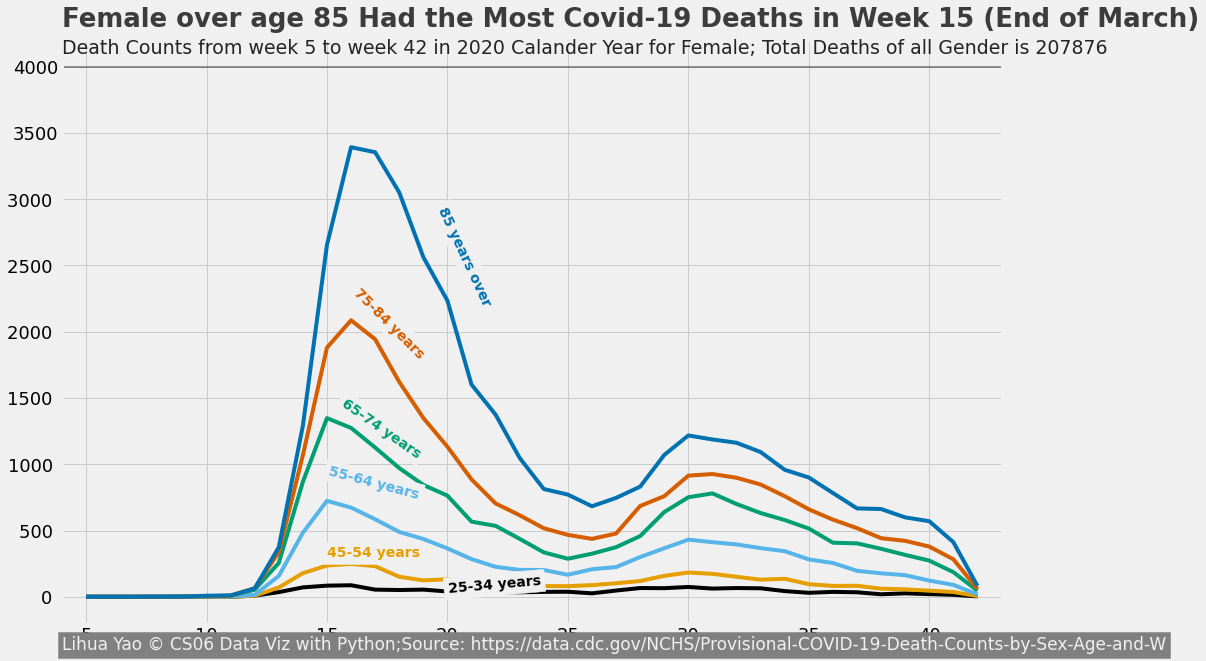

In [ ]:

#week_age_sex_covid_data_pivoted_M[age_group_name]
weeks=week_age_sex_covid_data_pivoted_F.index.tolist()
week_age_sex_covid_data_pivoted_F['week']=weeks
over_50=week_age_sex_covid_data_pivoted_F.loc[15,week_age_sex_covid_data_pivoted_M.iloc[15] >50].index
over_50=over_50[:-1]
over_50

# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255], [0,240/255,190/255]]
covid_plot=week_age_sex_covid_data_pivoted_F.plot(x='week', y=over_50, figsize=(15,10),color=colors, legend=False)
covid_plot.axhline(y=4000, alpha=0.5, linewidth=1.5,color='black')
covid_plot.tick_params(axis='both',which='major',labelsize=18)
covid_plot.set_xlim(left=4, right=43)
covid_plot.set_yticklabels(labels=['-400','0 ' ,'500 ', '1000 ', '1500 ', '2000 ','2500 ','3000 ','3500','4000'])
style.use('fivethirtyeight')
# Adding a signature bar
covid_plot.xaxis.label.set_visible(False)

covid_plot.text(x=4,
              y=-400,
              s="""Lihua Yao © CS06 Data Viz with Python;"""
                + """Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W""",
              fontsize=17,
              color='#f0f0f0',
              backgroundcolor='grey'
              )

covid_plot.text(x = 4, y = 4300, s = "Female over age 85 Had the Most Covid-19 Deaths in Week 15 (End of March)",
              fontsize = 26, weight = 'bold', alpha = .75)
covid_plot.text(x = 4, y = 4100,
              s = 'Death Counts from week 5 to week 42 in 2020 Calander Year for Female; Total Deaths of all Gender is 207876',
              fontsize = 19, alpha = .85)


covid_plot.text(x = 20, y = 30, s = '25-34 years', color = colors[0], weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 15, y = 300, s = '45-54 years', color = colors[1], weight = 'bold', rotation = 0,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 15, y = 740, s = '55-64 years', color = colors[2], weight = 'bold', rotation = -15,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 15.5, y = 1050, s = '65-74 years', color = colors[3], weight = 'bold', rotation = -35,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 16, y =1800, s = '75-84 years', color = colors[4], weight = 'bold', rotation = -45,
              backgroundcolor = '#f0f0f0')

covid_plot.text(x = 19.5, y = 2200, s = '85 years over', color = colors[5], weight = 'bold', rotation = -65,
              backgroundcolor = '#f0f0f0')
plt.show()

In [ ]:
United_States_Covid

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16558,10/22/2020,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,10/23/2020 01:44:31 PM,NaN,NaN
16559,10/23/2020,PW,0,NaN,NaN,0,0.0,0,NaN,NaN,0,0.0,10/24/2020 01:26:44 PM,NaN,NaN


,state,month,total_deaths
0,AK,1,0
1,AK,2,0
...,...,...,...
598,WY,9,13
599,WY,10,18


,state,month,total_cases
0,AK,1,0
1,AK,2,0
...,...,...,...
598,WY,9,2106
599,WY,10,5093


,state,month,total_deaths
50,CA,1,0
51,CA,2,0
...,...,...,...
518,TX,9,3175
519,TX,10,1793


<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Total COVID_19 death  for the top five states with the most deaths in USA by 2020-10-23')

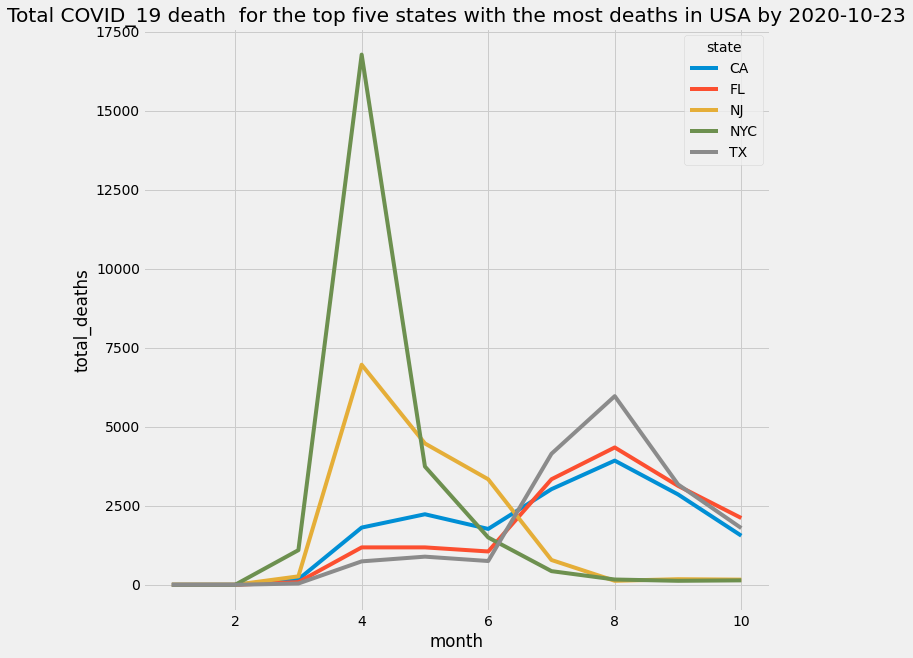

state,AK,AL,AR,AS,AZ,CA,CO,CT,DC,DE,FL,FSM,GA,GU,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MP,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,NYC,OH,OK,OR,PA,PR,PW,RI,RMI,SC,SD,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.00,0.00,0.00,0.0,1.00e-04,3.00e-04,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00e+00,0.00e+00,0.00,0.00,2.00e-04,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,1.00e-04,0.00,0.00,0.00
2,0.00,0.00,0.00,0.0,0.00e+00,9.00e-04,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00,0.00,0.00,0.00,1.00e-04,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,0.00e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00e-04,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,6.00e-04,0.00,0.00,0.00
3,0.01,0.10,0.06,0.0,1.29e-01,8.12e-01,0.30,0.31,0.05,0.03,0.65,0.0,0.46,7.10e-03,1.85e-02,0.05,0.05,5.99e-01,0.22,0.04,0.06,0.52,6.62e-01,0.17,0.03,0.76,0.07,0.13,2.00e-04,0.11,2.03e-02,0.16,0.01,0.02,0.04,1.87,0.03,0.11,3.27,4.18,0.22,0.06,6.89e-02,0.48,0.02,0.0,0.05,0.0,0.11,0.01,0.22,0.33,0.09,0.15,3.00e-03,0.03,4.89e-01,0.14,0.02,0.01
4,0.02,0.63,0.27,0.0,6.36e-01,4.08e+00,1.22,2.46,0.38,0.44,2.72,0.0,2.15,7.50e-03,3.77e-02,0.66,0.15,4.69e+00,1.57,0.38,0.41,2.28,5.56e+00,2.18,0.08,3.38,0.44,0.62,1.20e-03,0.61,2.50e-02,0.89,0.09,0.41,0.18,10.00,0.31,0.39,10.42,12.04,1.58,0.31,1.82e-01,4.09,0.13,0.0,0.81,0.0,0.50,0.23,0.85,2.48,0.38,1.54,3.60e-03,0.06,9.43e-01,0.55,0.10,0.04
5,0.01,1.09,0.40,0.0,1.23e+00,6.17e+00,1.12,1.45,0.45,0.49,2.11,0.0,2.09,2.90e-03,4.50e-03,1.24,0.08,6.73e+00,1.67,0.55,0.50,1.19,3.48e+00,2.99,0.12,1.60,2.01,0.56,8.00e-04,0.85,6.20e-03,1.81,0.15,0.98,0.25,4.18,0.43,0.36,3.06,4.33,1.75,0.27,1.73e-01,2.65,0.22,0.0,0.63,0.0,0.58,0.25,1.24,3.62,0.52,2.85,3.00e-04,0.01,7.38e-01,1.15,0.09,0.03


In [ ]:
United_States_Covid['month']=pd.DatetimeIndex(United_States_Covid['submission_date']).month

state_deaths_sum=United_States_Covid.groupby('state')['new_death'].sum()
state_name=state_deaths_sum.index
#state_sum[state_name[1]]
#State monthly cases
state_month_death_sum=United_States_Covid.groupby(['state','month'])['new_death'].sum()

temp=pd.DataFrame(state_month_death_sum)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(state_month_death_sum.values)],axis=1).reindex(temp.index)
temp.columns=['state','month','total_deaths']
state_month_death_covid=temp
state_month_death_covid

state_month_case_sum=United_States_Covid.groupby(['state','month'])['new_case'].sum()

temp=pd.DataFrame(state_month_case_sum)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(state_month_case_sum.values)],axis=1).reindex(temp.index)
temp.columns=['state','month','total_cases']
state_month_case_covid=temp
state_month_case_covid
state_month_case_covid['total_cases_per_ten_thousand']=state_month_case_covid['total_cases']/10000

#state_deaths_sum=United_States_Covid.groupby('state')['new_death'].sum()
#state_name=state_deaths_sum.index
#state_sum[state_name[1]]

tot_case_cut=np.sort(state_deaths_sum)[-6] #18948668
filter=state_deaths_sum >tot_case_cut
top_5_state=state_deaths_sum[filter]
filter1 = state_month_death_covid['state'].apply(lambda x: x in top_5_state)
top_5_state_death_data=state_month_death_covid[filter1]
top_5_state_death_data

plt.figure(figsize=(10, 10))
sns.lineplot(x='month',y='total_deaths', hue='state',data=top_5_state_death_data)
plt.title("Total COVID_19 death  for the top five states with the most deaths in USA by 2020-10-23")
plt.show()


state_month_case_covid_pivoted = state_month_case_covid.pivot(index='month', columns='state', values='total_cases_per_ten_thousand')
state_month_case_covid_pivoted.head()

state_month_death_covid_pivoted = state_month_death_covid.pivot(index='month', columns='state', values='total_deaths')


state_month_death_covid_pivoted.plot

Index(['CA', 'FL', 'IL', 'TN', 'TX', 'WI'], dtype='object', name='state')

,state,month,total_cases,total_cases_per_ten_thousand
0,AK,1,0,0.00
1,AK,2,0,0.00
...,...,...,...,...
598,WY,9,2106,0.21
599,WY,10,5093,0.51


8617022

224601

array([      7,      17,  186077,  876345,  725234,  837193, 1917706, 1461864, 1208976, 1403603])

,state,month,total_cases,total_cases_per_ten_thousand
0,AK,1,0,0.00
1,AK,2,0,0.00
...,...,...,...,...
598,WY,9,2106,0.21
599,WY,10,5093,0.51


Text(0.5, 1.0, 'USA COVID-19 Cases and Deaths By Month')

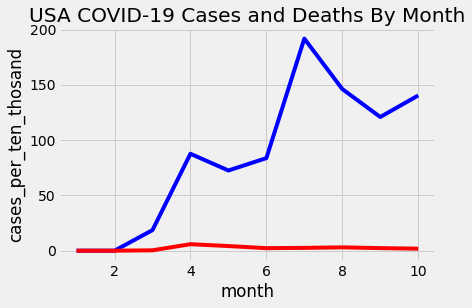

In [ ]:

filter=state_month_case_covid_pivoted.iloc[9] > 5
top_state=state_month_death_covid_pivoted.loc[9,filter].index
top_state
state_month_case_covid
#state_month_death_covid_pivoted.iloc[9]>50

#state_month_case_covid_pivoted[over_50].plot()
#state_month_case_covid_pivoted
state_month_case_covid['total_cases'].sum()#8469976
state_month_death_covid['total_deaths'].sum()#223393
month_case=state_month_case_covid.groupby(['month'])['total_cases'].sum()
month_death=state_month_death_covid.groupby(['month'])['total_deaths'].sum()
month_case.values
month_death=pd.DataFrame(month_death)
month_case=pd.DataFrame(month_case)
month_case['cases_per_ten_thosand']=month_case['total_cases']/10000
month_death['death_per_ten_thosand']=month_death['total_deaths']/10000
state_month_case_covid
figsize=(15,15)
sns.lineplot(x='month', y='cases_per_ten_thosand',color='blue',data=month_case)
sns.lineplot(x='month', y='death_per_ten_thosand',color='red',data=month_death)

#sns.lineplot(x='month', y='total_cases',color='blue',data=month_case)
#sns.lineplot(x='month', y='total_deaths',color='red',data=month_death)
plt.title('USA COVID-19 Cases and Deaths By Month')
plt.show()


style.use('fivethirtyeight')

In [ ]:
state_month_case_covid['total_cases'].sum()#23 day=8469976, 26 day=8469976
state_month_death_covid['total_deaths'].sum()#23 day=223393, 26day=2224601
[224601-223393, 8617022-8469976,224601/8617022 ]

8617022

224601

[1208, 147046, 0.02606480521925092]

Index(['CA', 'FL', 'GA', 'IL', 'MO', 'NC', 'TN'], dtype='object', name='state')

(1.0, 12.0)

[Text(0, 0, '-5'),
 Text(0, 0, '0 '),
 Text(0, 0, '5 '),
 Text(0, 0, '10 '),
 Text(0, 0, '15 '),
 Text(0, 0, '20 '),
 Text(0, 0, '25 '),
 Text(0, 0, '30 '),
 Text(0, 0, '40 ')]

Text(1, -5, 'Lihua Yao © CS06 Data Viz with Python                                                                     Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W/vsak-wrfus')

Text(3, 43, 'COVID-19 Cases_per_ten thousands')

Text(3, 41, 'For States with more than 500 deaths: Total Deaths of all Gender is 207876')

Text(3, 5, 'CA')

Text(3, 5, 'FL')

Text(3, 10, 'GA')

Text(3, 20, 'IL')

Text(3, 20, 'MO')

Text(3, 10, 'NC')

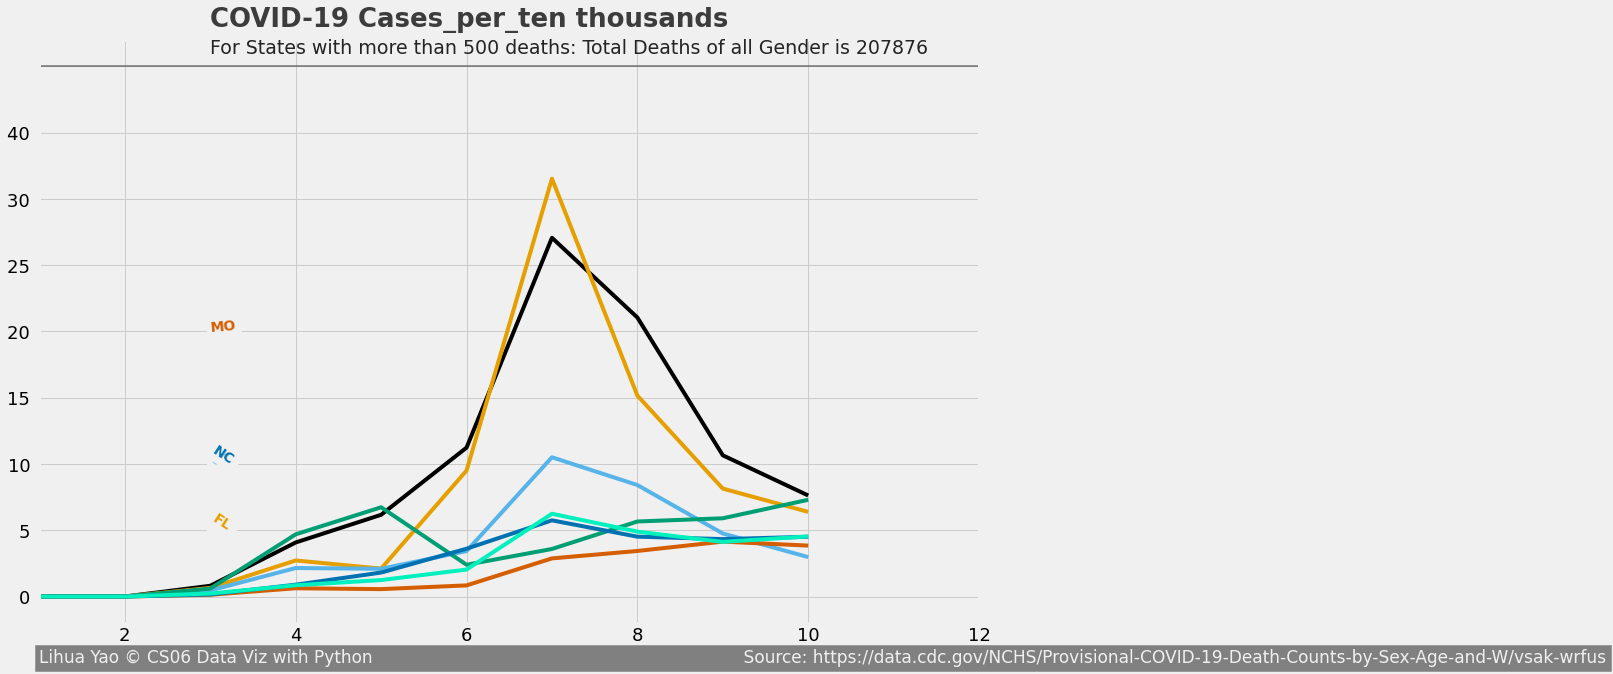

In [ ]:

#week_age_sex_covid_data_pivoted_M[age_group_name]
months=state_month_death_covid_pivoted.index.tolist()
state_month_death_covid_pivoted['month']=months
state_month_case_covid_pivoted['month']=months
over_50=state_month_death_covid_pivoted.loc[9,state_month_death_covid_pivoted.iloc[9] >500].index
over_50=over_50[:-1]
over_50

# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255], [0,240/255,190/255]]
covid_plot=state_month_case_covid_pivoted.plot(x='month', y=over_50, figsize=(15,10),color=colors, legend=False)
covid_plot.axhline(y=40, alpha=0.5, linewidth=1.5,color='black')
covid_plot.tick_params(axis='both',which='major',labelsize=18)
covid_plot.set_xlim(left=1, right=12)
covid_plot.set_yticklabels(labels=['-5','0 ' ,'5 ', '10 ', '15 ', '20 ','25 ', '30 ','40 '])
style.use('fivethirtyeight')
# Adding a signature bar
covid_plot.xaxis.label.set_visible(False)

covid_plot.text(x=1,
              y=-5,
              s="""Lihua Yao © CS06 Data Viz with Python             """
                + """                                                        """
                + """Source: https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W/vsak-wrfus""",
              fontsize=17,
              color='#f0f0f0',
              backgroundcolor='grey'
              )

covid_plot.text(x = 3, y = 43, s = "COVID-19 Cases_per_ten thousands",
              fontsize = 26, weight = 'bold', alpha = .75)
covid_plot.text(x = 3, y = 41,
              s = 'For States with more than 500 deaths: Total Deaths of all Gender is 207876',
              fontsize = 19, alpha = .85)


covid_plot.text(x = 3, y = 5, s = 'CA', color = colors[0], weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 3, y = 5, s = 'FL', color = colors[1], weight = 'bold', rotation = -33,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 3, y = 10, s = 'GA', color = colors[2], weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 3, y = 20, s = 'IL', color = colors[3], weight = 'bold', rotation = -33,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 3, y = 20, s = 'MO', color = colors[4], weight = 'bold', rotation = 5,
              backgroundcolor = '#f0f0f0')
covid_plot.text(x = 3, y = 10, s = 'NC', color = colors[5], weight = 'bold', rotation = -33,
              backgroundcolor = '#f0f0f0')



In [ ]:
Weekly_Death_data['month']=pd.DatetimeIndex(Weekly_Death_data['Week Ending Date']).month
#Weekly_Death_data['month']=pd.DatetimeIndex(Weekly_Death_data['Week Ending Date']).year
State_name=Weekly_Death_data['Jurisdiction'].unique()
len(State_name) #54 state

State_death= Weekly_Death_data.groupby(['Jurisdiction','Year'])['Number of Deaths'].sum()
#define total death for each state 

temp=pd.DataFrame(State_death)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(State_death.values)],axis=1).reindex(temp.index)
temp.columns=['State','Year','total_deaths']
state_year_deaths=temp
state_year_deaths

54

,State,Year,total_deaths
0,Alabama,2015,77032.0
1,Alabama,2016,79430.0
...,...,...,...
322,Wyoming,2019,2810.0
323,Wyoming,2020,2356.0


In [ ]:
# Deisease by year and by causes
Disease_causes=Weekly_Death_data['Cause Group'].unique()
#Disease_causes
#for i, dis in enumerate(Disease_causes):
#  print(dis)
#
State_death_cause= Weekly_Death_data.groupby(['Jurisdiction','Year','Cause Group'])['Number of Deaths'].sum()
#define total death for each state 
temp
temp=pd.DataFrame(State_death_cause)
temp=pd.DataFrame(temp.index.tolist())
temp
temp=pd.concat([temp,pd.DataFrame(State_death_cause.values)],axis=1).reindex(temp.index)
temp.columns=['State','Year','Cause_group','total_deaths']
state_year_deaths_cause=temp
state_year_deaths_cause  

,State,Year,total_deaths
0,Alabama,2015,77032.0
1,Alabama,2016,79430.0
...,...,...,...
322,Wyoming,2019,2810.0
323,Wyoming,2020,2356.0


,0,1,2
0,Alabama,2015,Alzheimer disease and dementia
1,Alabama,2015,Cerebrovascular diseases
...,...,...,...
3773,Wyoming,2020,Malignant neoplasms
3774,Wyoming,2020,Other diseases of the circulatory system


,State,Year,Cause_group,total_deaths
0,Alabama,2015,Alzheimer disease and dementia,8556.0
1,Alabama,2015,Cerebrovascular diseases,5512.0
...,...,...,...,...
3773,Wyoming,2020,Malignant neoplasms,1382.0
3774,Wyoming,2020,Other diseases of the circulatory system,48.0


In [ ]:
#COVID_19
USAStateABV_data=pd.read_csv('USAStateABV.csv')

#state_covid_cases=pd.DataFrame(state_cases_sum)

state_covid_deaths=pd.DataFrame(state_deaths_sum)
state_covid_deaths['Code']=state_covid_deaths.index
state_covid_deaths_sorted=state_covid_deaths.sort_values(by='Code')
#state_covid_deaths_sorted
USAStateABV_data_sorted=USAStateABV_data.sort_values(by='Code')
state_covid_deaths_sorted=pd.merge(state_covid_deaths_sorted,USAStateABV_data_sorted,how='right')
state_covid_deaths_sorted=state_covid_deaths_sorted.sort_values(by='State')
state_names=state_covid_deaths_sorted['State'].unique()
len(state_names)

filter=state_year_deaths_cause['State'].apply(lambda x: True if x in state_names else False)
filter
state_year_deaths_cause[filter]
#state_year_deaths_sorted=state_year_deaths.sort_values(by="State")
#state_year_deaths_sorted=pd.merge(state_year_deaths_sorted,USAStateABV_data_sorted,how='inner')
state_year_deaths_cause_sorted=state_year_deaths_cause[filter]
len(state_covid_deaths_sorted['new_death'].values)#51
len(state_year_deaths_cause_sorted['State'].unique())

51

0       True
1       True
        ... 
3773    True
3774    True
Name: State, Length: 3775, dtype: bool

,State,Year,Cause_group,total_deaths
0,Alabama,2015,Alzheimer disease and dementia,8556.0
1,Alabama,2015,Cerebrovascular diseases,5512.0
...,...,...,...,...
3773,Wyoming,2020,Malignant neoplasms,1382.0
3774,Wyoming,2020,Other diseases of the circulatory system,48.0


51

51

In [ ]:
Disease_causes=Weekly_Death_data['Cause Group'].unique()
Disease_causes
for i, dis in enumerate(Disease_causes):
  print(dis)
  


array(['Alzheimer disease and dementia', 'Cerebrovascular diseases', 'Heart failure', 'Hypertensive diseases', 'Ischemic heart disease', 'Other diseases of the circulatory system', 'Malignant neoplasms', 'Diabetes', 'Renal failure', 'Sepsis', 'Chronic lower respiratory disease', 'Influenza and pneumonia', 'Other diseases of the respiratory system'], dtype=object)

Alzheimer disease and dementia
Cerebrovascular diseases
Heart failure
Hypertensive diseases
Ischemic heart disease
Other diseases of the circulatory system
Malignant neoplasms
Diabetes
Renal failure
Sepsis
Chronic lower respiratory disease
Influenza and pneumonia
Other diseases of the respiratory system


array([  2419.,   2808.,   2870.,   3030.,   3226.,   3234.,   6217.,   6514.,   6940.,   7078.,   7566.,   7712.,   7788.,   8792.,   8806.,   9226.,   9350.,   9390.,   9495.,  11254.,  11888.,  12221.,  12322.,  12592.,  12610.,  13604.,  13970.,  14430.,  15294.,  16055.,  16462.,  17654.,  18102.,  19046.,  19148.,  19255.,  19260.,  19646.,  19854.,  21098.,  21138.,  23342.,  23836.,  24438.,  25501.,  26198.,  27234.,  27258.,  27282.,  27340.,  27692.,  27806.,  27812.,  28418.,  28838.,  30130.,  31224.,  32696.,  32974.,  33634.,  41594.,  47068.,  47864.,  49902.,  50250.,  51334.,  55093.,  73288.,  75344.,  75778.,  76726.,  77474.,  86875., 118976., 119264., 119298., 119428., 120352.])

<Figure size 720x720 with 0 Axes>

Text(0.5, 1.0, 'Total death in California grouped by the Cause without COVID_19 data by 2020-10-6')

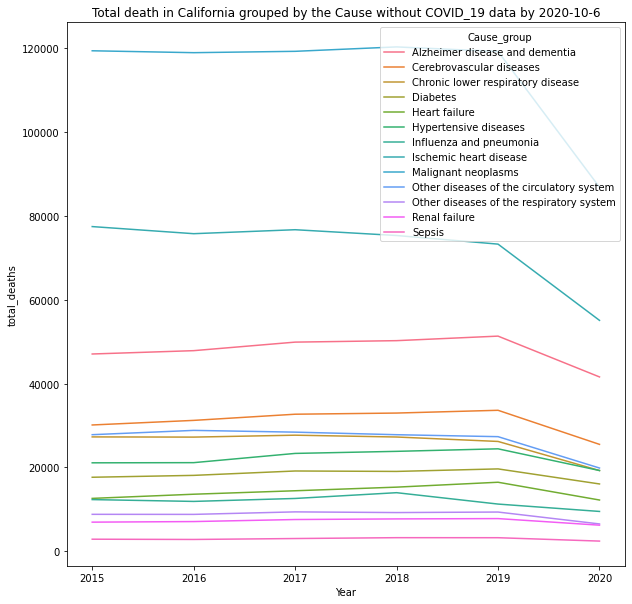

In [ ]:
filter=state_year_deaths_cause_sorted['State']=='California'
CA_dat=state_year_deaths_cause_sorted[filter]
np.sort(CA_dat['total_deaths'])
filter=CA_dat['total_deaths'] >70000
CA_dat_top_death=CA_dat[filter]
#causes_name=state_year_deaths_cause_sorte['Cause_group']

plt.figure(figsize=(10, 10))
sns.lineplot(x='Year',y='total_deaths', hue='Cause_group', data=CA_dat)
plt.title("Total death in California grouped by the Cause without COVID_19 data by 2020-10-6")
plt.show()



In [ ]:
filter=CA_dat['Year']==2019
np.argmax(CA_dat[filter]['total_deaths']) 
np.sort(CA_dat[filter]['total_deaths'])[-1]

filter1=CA_dat[filter]['total_deaths']>20000
CA_dat[filter][filter1]['Cause_group'].values

8

119264.0

array(['Alzheimer disease and dementia', 'Cerebrovascular diseases', 'Chronic lower respiratory disease', 'Hypertensive diseases', 'Ischemic heart disease', 'Malignant neoplasms', 'Other diseases of the circulatory system'], dtype=object)

array([ 3875.,  4657.,  4754.,  4890.,  5011.,  5026.,  5038.,  5112.,  5426.,  5488.,  5670.,  5703.,  6186.,  6224.,  6232.,  6240.,  6304.,  6428.,  6484.,  6517.,  7198.,  7292.,  7412.,  7758.,  7810.,  7838.,  8066.,  8306.,  8480.,  8600., 10837., 10866., 11460., 11638., 11699., 12016., 12358., 12448., 12492., 13218., 14160., 14444., 16221., 17921., 22558., 22590., 22682., 22934., 23042., 23098., 23446., 23520., 24000., 24060., 24176., 24890., 25394., 25594., 26972., 28276., 29133., 31382., 32486., 34434., 34766., 34776., 46009., 58786., 59578., 59688., 60078., 60340., 66637., 87394., 87694., 89750., 90238., 90908.])

<Figure size 1080x1080 with 0 Axes>

Text(0.5, 1.0, 'Total death in Florida grouped by the Cause without COVID_19 data by 2020-10-6')

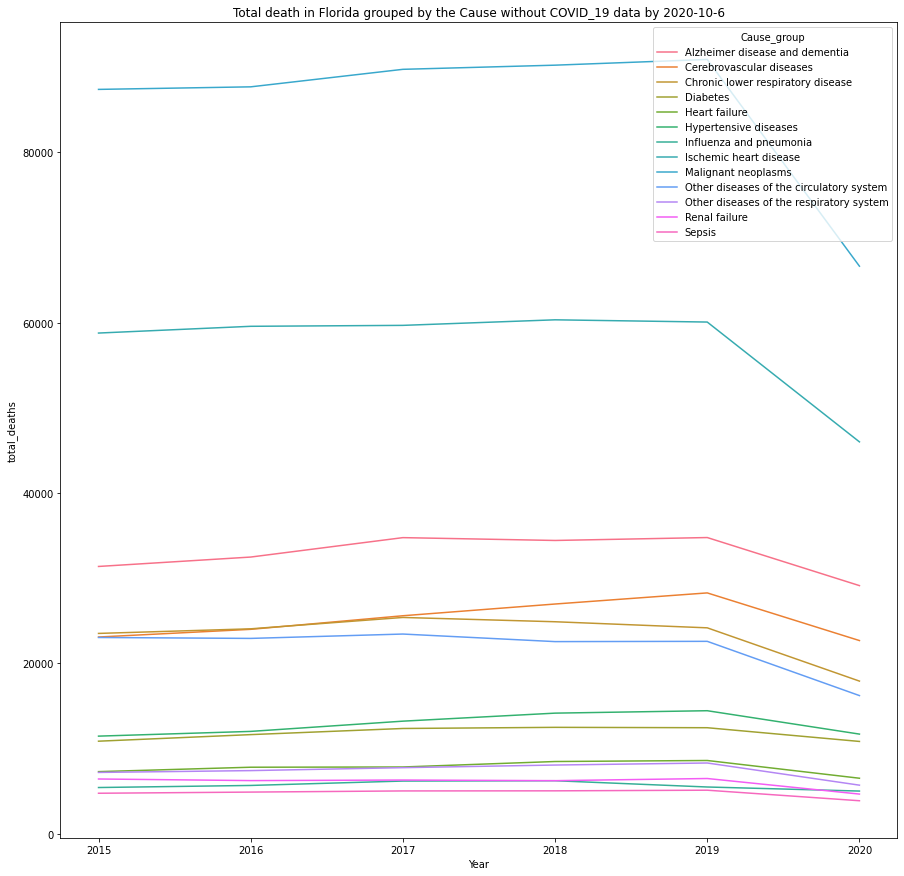

In [ ]:
filter=state_year_deaths_cause_sorted['State']=='Florida'
CA_dat=state_year_deaths_cause_sorted[filter]
np.sort(CA_dat['total_deaths'])
filter=CA_dat['total_deaths'] >70000
CA_dat_top_death=CA_dat[filter]
#causes_name=state_year_deaths_cause_sorte['Cause_group']

plt.figure(figsize=(15, 15))
sns.lineplot(x='Year',y='total_deaths', hue='Cause_group', data=CA_dat)
plt.title("Total death in Florida grouped by the Cause without COVID_19 data by 2020-10-6")
plt.show()

In [ ]:
filter=state_year_deaths_cause_sorted['Year']==2020

temp=state_year_deaths_cause_sorted[filter]
temp['total_deaths_updated']=[int(i) for i in (temp['total_deaths']+state_covid_deaths_cuase_sorted['new_death'].values)/10000]

temp
#state_year_deaths_sorted[filter]['total_deaths_updated']=temp['total_deaths_updated']
filter=state_year_deaths_sorted['Year'] < 2020
temp1=state_year_deaths_sorted[filter]
temp1['total_deaths_updated']=temp1['total_deaths']/10000

state_year_deaths_updated=pd.concat([temp1, temp],axis=0)


state_year_deaths_updated['total_deaths_per_ten_thousand']=state_year_deaths_updated['total_deaths']/10000
state_year_deaths_updated['total_deaths_updated_per_ten__thousand']=state_year_deaths_updated['total_deaths_updated']
state_year_deaths_updated
#%.08f

np.sort(state_covid_deaths_sorted['new_death'])[-15:]

filter=state_covid_deaths_sorted['new_death'] >7000
bad_state=state_covid_deaths_sorted[filter]['State'].unique()
filter=state_year_deaths_updated['State'].apply(lambda x: x in bad_state)

final_15=state_year_deaths_updated[filter]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,State,Year,total_deaths,total_deaths_updated
5,Alabama,2020,62725.0,6
11,Alaska,2020,1634.0,0
...,...,...,...,...
317,Wisconsin,2020,59336.0,6
323,Wyoming,2020,2356.0,0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,State,Year,total_deaths,total_deaths_updated,total_deaths_per_ten_thousand,total_deaths_updated_per_ten__thousand
0,Alabama,2015,77032.0,7.70,7.70,7.70
1,Alabama,2016,79430.0,7.94,7.94,7.94
...,...,...,...,...,...,...
317,Wisconsin,2020,59336.0,6.00,5.93,6.00
323,Wyoming,2020,2356.0,0.00,0.24,0.00


array([ 3973,  4521,  4947,  5592,  5713,  7161,  7229,  8244,  9077,  9085,  9531, 14767, 16111, 16147, 16177])

<Figure size 576x576 with 0 Axes>

Text(0.5, 1.0, 'Total Deaths  for all causes including COVID_19 in USA by 2020-10-6 for States with at least 7000 COVID_19 Deaths')

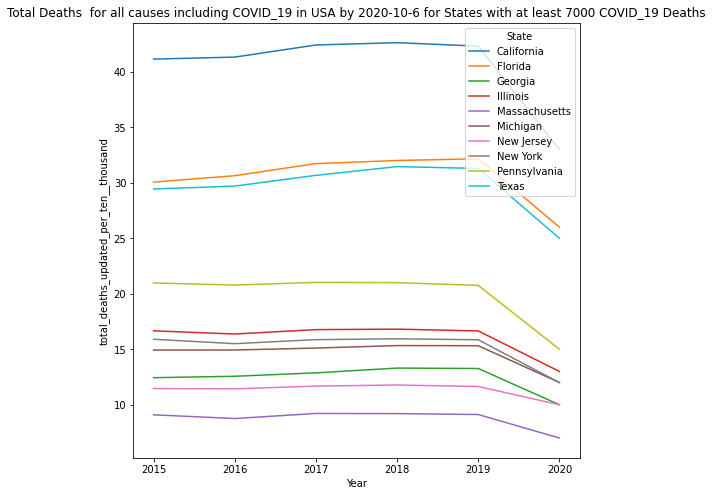

In [ ]:
plt.figure(figsize=(8, 8))
#sns.lineplot(x='Year',y='Covid_Death', hue='State',data=state_year_deaths_2020)
sns.lineplot(x='Year',y='total_deaths_updated_per_ten__thousand', hue='State',data=final_15)
#sns.lineplot(x='Year',y='total_deaths_covid_included_per_ten__thousand', hue='State',data=temp)

plt.title("Total Deaths  for all causes including COVID_19 in USA by 2020-10-6 for States with at least 7000 COVID_19 Deaths")
plt.show()
